In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df = pd.read_csv("food_ingredients_and_allergens.csv")

df["features"] = (
    df[["Main Ingredient", "Sweetener", "Fat/Oil", "Seasoning", "Allergens"]]
    .astype(str)
    .agg(", ".join, axis=1)
)

In [3]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf_vectorizer.fit_transform(df["features"])

# Calculate cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [4]:

def get_recommendations(user_preferences, cosine_sim_matrix, df):
    user_profile = tfidf_vectorizer.transform([user_preferences])

    sim_scores = list(cosine_similarity(user_profile, tfidf_matrix).flatten())

    top_indices = sorted(
        range(len(sim_scores)), key=lambda i: sim_scores[i], reverse=True
    )[:5]
    return df.iloc[top_indices]["Food Product"]



In [5]:
# Example usage
user_preferences = "Chicken, None, None, Butter, Salt, None"
recommendations = get_recommendations(user_preferences, cosine_sim, df)

print("Recommended Food Items:")
print(recommendations)


Recommended Food Items:
2     Chicken Noodle Soup
3     Chicken Noodle Soup
4          Cheddar Cheese
12        Mashed Potatoes
6         Caramel Popcorn
Name: Food Product, dtype: object


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Calculate cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Convert cosine_sim to a DataFrame
cosine_sim_df = pd.DataFrame(cosine_sim)


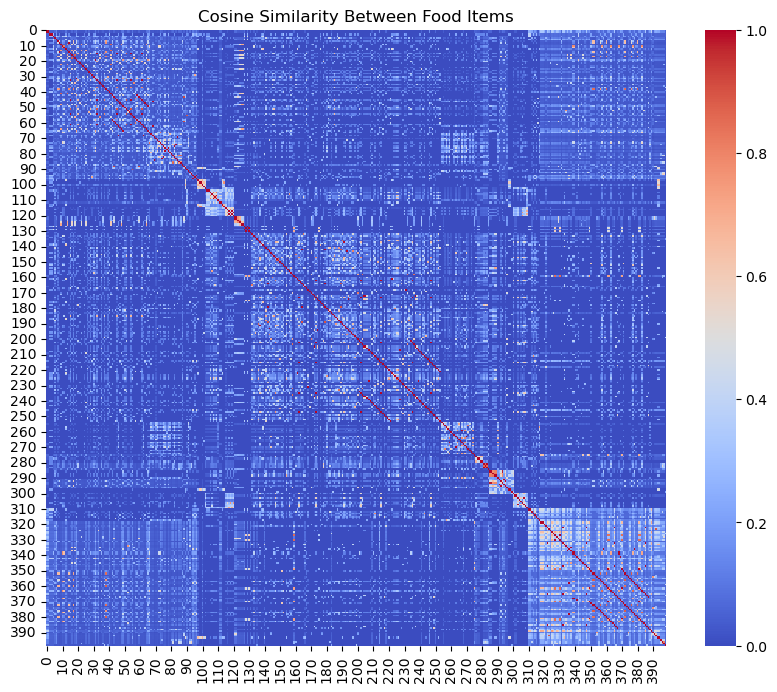

In [8]:

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_df, cmap='coolwarm')
plt.title('Cosine Similarity Between Food Items')
plt.show()

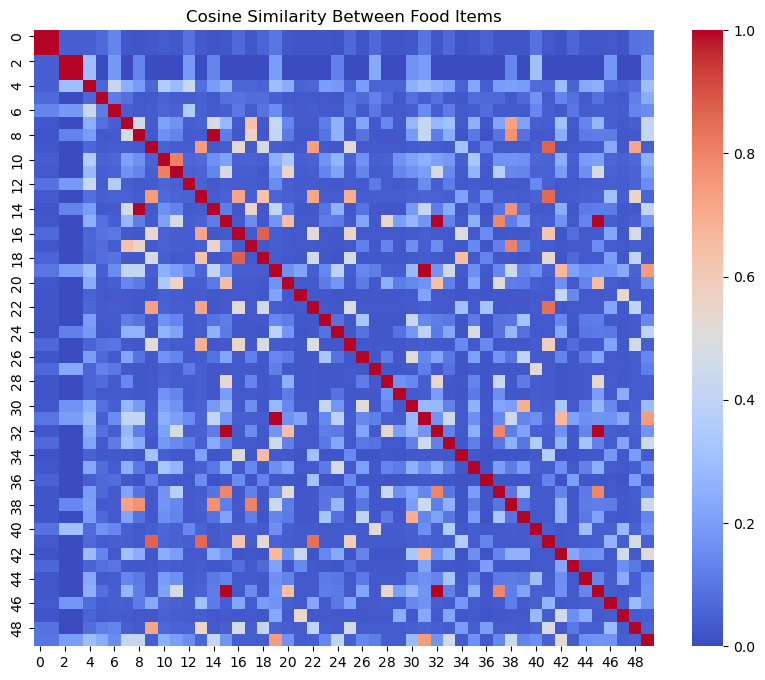

In [9]:
cosine_sim_df = cosine_sim_df.iloc[:50, :50]

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_df, cmap='coolwarm')
plt.title('Cosine Similarity Between Food Items')
plt.show()

In [10]:
df

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Prediction,features
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains,"Almonds, Sugar, Butter, Flour, Almonds, Wheat,..."
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains,"Almonds, Sugar, Butter, Flour, Almonds, Wheat,..."
2,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains,"Chicken broth, None, None, Salt, Chicken, Whea..."
3,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains,"Chicken broth, None, None, Salt, Chicken, Whea..."
4,Cheddar Cheese,Cheese,None,None,Salt,Dairy,Contains,"Cheese, None, None, Salt, Dairy"
...,...,...,...,...,...,...,...,...
394,Lemon Bars,Lemon juice,Sugar,Butter,"Flour, eggs","Wheat, Dairy, Eggs",Contains,"Lemon juice, Sugar, Butter, Flour, eggs, Wheat..."
395,Pecan Pie,Pecans,Sugar,Butter,Corn syrup,"Wheat, Dairy, Nuts",Contains,"Pecans, Sugar, Butter, Corn syrup, Wheat, Dair..."
396,Zucchini Bread,Zucchini,Sugar,Butter,"Cinnamon, nuts","Wheat, Dairy, Nuts",Contains,"Zucchini, Sugar, Butter, Cinnamon, nuts, Wheat..."
397,Banana Bread,Bananas,Sugar,Butter,"Cinnamon, nuts","Wheat, Dairy, Nuts",Contains,"Bananas, Sugar, Butter, Cinnamon, nuts, Wheat,..."


In [11]:
unique_values = df['Main Ingredient'].unique()
print(unique_values)

['Almonds' 'Chicken broth' 'Cheese' 'Buttermilk' 'Popcorn'
 'Romaine lettuce' 'Grilled chicken' 'Strawberries' 'Potatoes'
 'Yogurt (milk, cultures)' 'Tomatoes' 'Mixed berries' 'Chicken'
 'Pesto sauce' 'Beef' 'Bananas' 'Watermelon' 'Mango' 'Cucumbers'
 'Butternut squash' 'Pasta' 'Lamb' 'Mushrooms' 'Greek yogurt' 'Eggplant'
 'Pizza dough' 'Spinach' 'Chocolate' 'Portobello mushrooms' 'Pumpkin'
 'Berries' 'Paneer' 'Lentils' 'Cottage cheese' 'Milk solids'
 'Lentil dumplings' 'Milk' 'Rice' 'Chicken breast' 'Bacon'
 'Sweet potatoes' 'Brie cheese' 'Onions' 'Lamb/Chicken' 'Eggs'
 'Fish fillets' 'Salmon fillet' 'Salmon' 'Fish' 'Cod' 'Tuna'
 'Fish (salmon, tuna)' 'Sushi rice' 'Sugar' 'Apples' 'Oranges' 'Cucumber'
 'Ground beef' 'Pork ribs' 'Quinoa' 'Mixed vegetables' 'Lemon juice'
 'Vegetables' 'Avocado' 'Black beans' 'Mixed fruits' 'Sausage'
 'Bell peppers' 'Cabbage' 'Zucchini' 'Chicken wings' 'Tofu'
 'Brussels sprouts' 'Carrots' 'Chickpeas' 'Potato' 'Semolina'
 'Kidney beans' 'Fermented batter'

In [12]:
unique_values = df['Sweetener'].unique()
print(unique_values)

['Sugar' 'None' 'Honey' 'Brown sugar' 'Mayonnaise' 'Rice vinegar'
 'Cocoa butter' 'Caramel' 'Tamarind' 'Marshmallows']


In [13]:
unique_values = df['Fat/Oil'].unique()
print(unique_values)

['Butter' 'None' 'Vegetable oil' 'Olive oil' 'Caesar dressing'
 'Yogurt (milk, cultures)' 'Sour cream' 'Bread crumbs, Parmesan cheese'
 'Milk' 'Cream cheese, sour cream' 'Heavy cream' 'Yogurt' 'Ghee' 'Oil'
 'Cream' 'Milk, Ghee' 'Cheese' 'Sesame oil' 'Coconut oil' 'Soy sauce'
 'Milk powder' 'Mustard' 'Water' 'Pancetta' 'Coconut milk' 'Avocado'
 'Pesto sauce' 'Peanut butter' 'Peanut oil' 'Mayonnaise' 'Bacon'
 'Whipped cream' 'Enchilada sauce' 'Chocolate' 'Mascarpone cheese'
 'Mascarpone cheese, coffee liqueur']


In [14]:
unique_values = df['Seasoning'].unique()
print(unique_values)

['Flour' 'Salt' 'Garlic, herbs' 'Parmesan cheese'
 'Lettuce, Parmesan cheese' 'None' 'Tomato sauce' 'Tomato sauce, basil'
 'Salt, Pepper' 'Mozzarella cheese, basil' 'Caesar dressing' 'Granola'
 'Cream, Parmesan cheese' 'Mushroom, onion' 'Feta cheese, mint'
 'Marinara sauce' 'Cardamom' 'Feta cheese, olives' 'Vegetable broth'
 'Fresh tomatoes, mozzarella' 'Tzatziki sauce, tomatoes, onions'
 'Spinach, feta cheese' 'Arborio rice, Parmesan cheese'
 'Granola, mixed berries' 'Marinara sauce, cheese'
 'Vanilla pudding mix, cookies' 'Mozzarella cheese, tomatoes, basil'
 'Romaine lettuce, Parmesan cheese' 'Feta cheese, phyllo dough'
 'Parmesan cheese, garlic' 'Vanilla extract' 'Cheese, breadcrumbs'
 'Tandoori spices' 'Mushrooms, onions' 'Milk' 'Goat cheese, herbs'
 'Nutmeg, cream' 'Lemon, capers' 'Tomato sauce, cream' 'Paneer, spices'
 'Yogurt, Kashmiri red chili' 'Tikka masala, spices' 'Cream, spices'
 'Creamy tomato sauce' 'Cardamom syrup' 'Creamy sauce, spices' 'Spices'
 'Tamarind chutney, sp

In [15]:
unique_values = df['Allergens'].unique()
print(unique_values)

['Almonds, Wheat, Dairy' 'Chicken, Wheat, Celery' 'Dairy'
 'Dairy, Anchovies' 'Dairy, Cocoa' 'Dairy, Eggs' 'Dairy, Fish'
 'Dairy, Ghee' 'Dairy, Nuts' 'Dairy, Wheat' 'Eggs' 'Eggs, Dairy'
 'Eggs, Mustard' 'Eggs, Soybeans' 'Fish' 'Fish, Coconut' 'Fish, Dairy'
 'Fish, Eggs' 'Fish, Soybeans' 'Milk' 'Milk, Strawberries' 'None'
 'Oats, Dairy' 'Peanuts' 'Pine nuts, Dairy' 'Rice, Dairy' 'Shellfish'
 'Shellfish, Dairy' 'Shellfish, Eggs' 'Shellfish, Pork'
 'Shellfish, Soybeans' 'Soybeans' 'Soybeans, Fish' 'Wheat' 'Wheat, Dairy'
 'Wheat, Dairy, Alcohol' 'Wheat, Dairy, Cocoa' 'Wheat, Dairy, Eggs'
 'Wheat, Dairy, Nuts' 'Wheat, Pork, Dairy']


In [18]:
unique_values = df['features'].unique()
print(unique_values)

['Almonds, Sugar, Butter, Flour, Almonds, Wheat, Dairy'
 'Chicken broth, None, None, Salt, Chicken, Wheat, Celery'
 'Cheese, None, None, Salt, Dairy'
 'Buttermilk, Sugar, Vegetable oil, Garlic, herbs, Dairy'
 'Popcorn, Sugar, Butter, Salt, Dairy'
 'Romaine lettuce, None, Olive oil, Parmesan cheese, Dairy'
 'Grilled chicken, None, Caesar dressing, Lettuce, Parmesan cheese, Dairy'
 'Strawberries, Honey, Yogurt (milk, cultures), None, Dairy'
 'Cheese, None, None, Tomato sauce, Dairy'
 'Cheese, None, None, Tomato sauce, basil, Dairy'
 'Potatoes, None, Butter, Salt, Pepper, Dairy'
 'Yogurt (milk, cultures), None, None, None, Dairy'
 'Tomatoes, None, Olive oil, Mozzarella cheese, basil, Dairy'
 'Mixed berries, Sugar, Yogurt (milk, cultures), None, Dairy'
 'Romaine lettuce, None, Olive oil, Caesar dressing, Dairy'
 'Mixed berries, Sugar, Yogurt (milk, cultures), Granola, Dairy'
 'Chicken, None, Butter, Cream, Parmesan cheese, Dairy'
 'Pesto sauce, None, None, Mozzarella cheese, basil, Dairy'
